In [311]:
import numpy as np
import pandas as pd
import seaborn as sns
import warnings


warnings.filterwarnings('ignore')

In [312]:
data=pd.read_csv('/kaggle/input/loan-data/loan_approval_data.csv')

In [313]:
data.head()

,loan_id,no_of_dependents,education,self_employed,employment_type,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,12th,No,Salaried,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,12th,No,Salaried,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,8th,No,Salaried,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,8th,No,Salaried,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Graduate,No,Salaried,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [314]:
data.shape

(4269, 14)

In [315]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   loan_id                   4269 non-null   int64 
 1   no_of_dependents          4269 non-null   int64 
 2   education                 4269 non-null   object
 3   self_employed             4269 non-null   object
 4   employment_type           4269 non-null   object
 5   income_annum              4269 non-null   int64 
 6   loan_amount               4269 non-null   int64 
 7   loan_term                 4269 non-null   int64 
 8   cibil_score               4269 non-null   int64 
 9   residential_assets_value  4269 non-null   int64 
 10  commercial_assets_value   4269 non-null   int64 
 11  luxury_assets_value       4269 non-null   int64 
 12  bank_asset_value          4269 non-null   int64 
 13  loan_status               4269 non-null   object
dtypes: int64(10), object(4)


In [316]:
data.sample(10)

,loan_id,no_of_dependents,education,self_employed,employment_type,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
3554,3555,0,10th,No,Salaried,7300000,28200000,16,486,15300000,8800000,16400000,7700000,Rejected
1842,1843,0,Graduate,No,Salaried,2100000,5900000,14,402,4400000,0,4800000,1000000,Rejected
961,962,4,12th,Yes,Business,2400000,7400000,18,888,2700000,1600000,7600000,3200000,Approved
1964,1965,3,12th,No,Salaried,3800000,11800000,4,694,0,500000,8300000,5100000,Approved
4061,4062,5,8th,No,Salaried,2000000,6900000,18,516,4600000,3400000,6500000,1600000,Rejected
2476,2477,2,12th,Yes,Business,8700000,26400000,2,778,8500000,2400000,28800000,10300000,Approved
1372,1373,3,Graduate,Yes,Freelancer,700000,2500000,14,819,1600000,1000000,2100000,900000,Approved
1822,1823,2,10th,Yes,Business,6200000,16500000,4,510,14100000,4700000,18200000,6300000,Rejected
1278,1279,4,12th,No,Salaried,7600000,29000000,8,739,22100000,8100000,22100000,8800000,Approved
626,627,3,12th,Yes,Business,3500000,13300000,4,798,7400000,5300000,12100000,3600000,Approved


In [317]:
data.drop(columns=['loan_id','employment_type'],inplace=True)

In [318]:
data.isnull().sum()

no_of_dependents            0
education                   0
self_employed               0
income_annum                0
loan_amount                 0
loan_term                   0
cibil_score                 0
residential_assets_value    0
commercial_assets_value     0
luxury_assets_value         0
bank_asset_value            0
loan_status                 0
dtype: int64

In [319]:
data.duplicated().sum()

0

In [320]:
data.describe()

,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


In [321]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder

In [322]:
data['education'].value_counts()

education
10th        1126
8th         1072
12th        1062
Graduate    1009
Name: count, dtype: int64

In [323]:
education_order = [['Graduate', '12th', '10th', '8th']]
oe = OrdinalEncoder(categories=education_order)
data[['education']] = oe.fit_transform(data[['education']])

In [324]:
data['loan_status'].value_counts()

loan_status
Approved    2656
Rejected    1613
Name: count, dtype: int64

In [325]:
data['loan_status'] = data['loan_status'].apply(lambda x: 1 if x == 'Approved' else 0)

In [326]:
data.sample(10)

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
1443,3,2.0,No,9100000,29300000,2,508,19000000,5100000,31600000,11900000,1
37,5,3.0,No,8000000,27200000,6,348,6400000,300000,16700000,7100000,0
2588,0,3.0,Yes,4700000,11500000,18,559,7500000,0,18700000,2600000,1
218,1,3.0,Yes,6800000,17000000,2,744,15500000,3900000,23700000,3500000,1
794,2,0.0,Yes,2900000,10600000,6,614,1000000,300000,7600000,3600000,1
3771,2,1.0,Yes,2700000,9500000,10,434,2700000,1500000,8100000,1800000,0
947,1,3.0,No,2300000,6600000,18,513,4600000,900000,9000000,1600000,0
3286,3,3.0,Yes,5300000,20300000,14,432,15000000,0,17200000,5900000,0
1514,3,0.0,Yes,4700000,17400000,10,393,12400000,5300000,18700000,5300000,0
2972,2,3.0,No,4900000,18500000,8,492,12900000,5000000,10200000,5800000,0


In [327]:
data['education']=data['education'].astype(int)

In [328]:
data.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,1,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,1
1,0,1,No,4100000,12200000,8,417,2700000,2200000,8800000,3300000,0
2,3,3,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,0
3,3,3,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,0
4,5,0,No,9800000,24200000,20,382,12400000,8200000,29400000,5000000,0


In [329]:
data['self_employed'] = data['self_employed'].apply(lambda x: 1 if x == 'Yes' else 0)

In [330]:
data.sample(10)

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
3218,4,1,0,7000000,24100000,10,677,18800000,6000000,21600000,6300000,1
415,3,1,1,1700000,4600000,12,385,1500000,1300000,5200000,1700000,0
4053,1,0,1,7000000,20300000,14,837,7700000,2200000,19700000,5500000,1
3246,2,2,1,5400000,14800000,6,724,1000000,400000,13100000,5400000,1
1721,3,2,1,3100000,11400000,16,562,3600000,3600000,7200000,3100000,1
2745,3,0,1,8800000,26700000,12,708,16000000,15300000,26900000,9600000,1
341,5,0,1,8600000,21000000,8,465,11700000,14900000,19500000,9900000,0
3933,0,1,1,9800000,20100000,16,606,6200000,800000,37300000,8700000,1
283,3,0,1,6800000,19900000,10,516,16000000,6000000,26000000,8500000,0
3176,4,3,0,3100000,8200000,18,408,2900000,3800000,10800000,3100000,0


In [331]:
data['loan_to_income_ratio'] = data['loan_amount'] / data['income_annum']
data['total_assets_value'] = (data['residential_assets_value'] + data['commercial_assets_value'] +
                              data['luxury_assets_value'] + data['bank_asset_value'])

In [332]:
data.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status,loan_to_income_ratio,total_assets_value
0,2,1,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,1,3.114583,50700000
1,0,1,0,4100000,12200000,8,417,2700000,2200000,8800000,3300000,0,2.975610,17000000
2,3,3,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,0,3.263736,57700000
3,3,3,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,0,3.743902,52700000
4,5,0,0,9800000,24200000,20,382,12400000,8200000,29400000,5000000,0,2.469388,55000000


In [333]:
corr_matrix = data.corr()

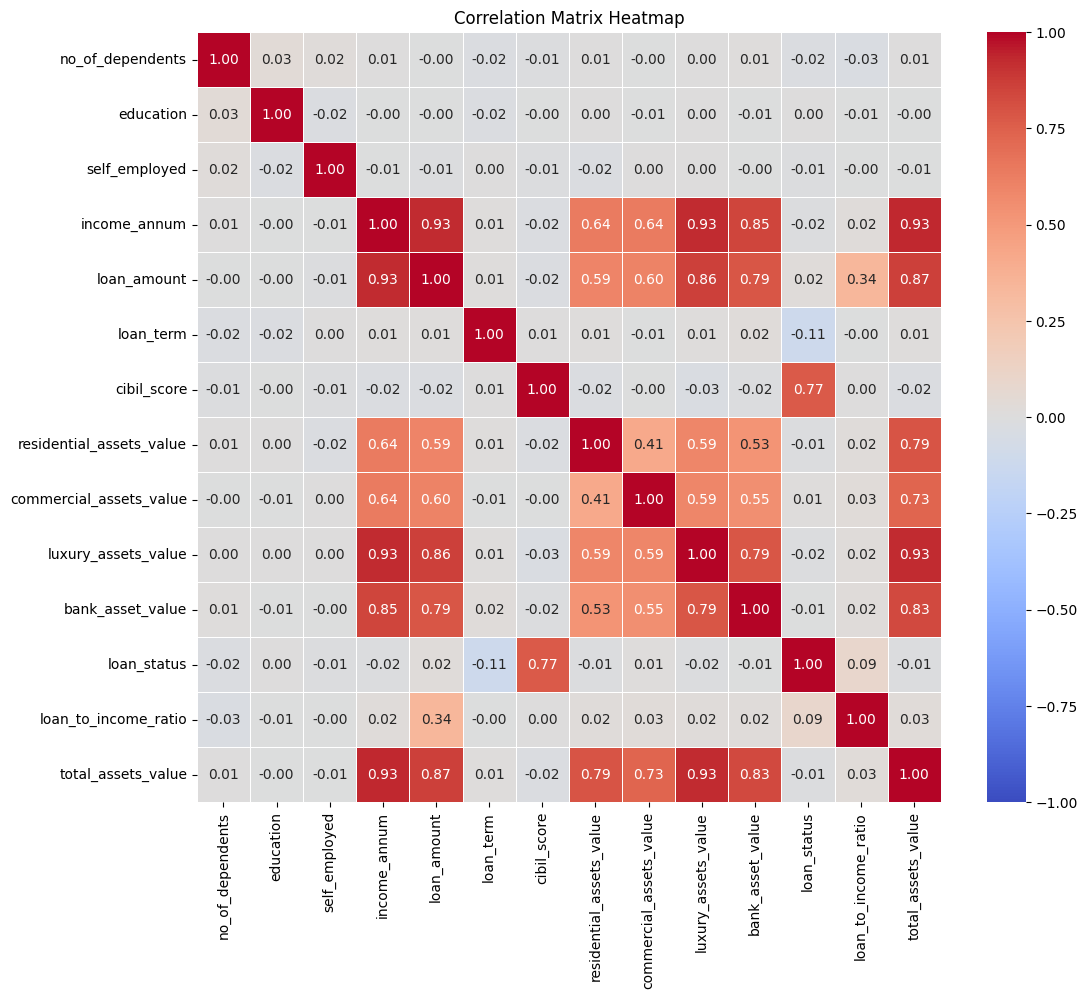

In [334]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))  
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, vmin=-1, vmax=1)


plt.title('Correlation Matrix Heatmap')
plt.show()

In [335]:
data.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status,loan_to_income_ratio,total_assets_value
0,2,1,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,1,3.114583,50700000
1,0,1,0,4100000,12200000,8,417,2700000,2200000,8800000,3300000,0,2.975610,17000000
2,3,3,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,0,3.263736,57700000
3,3,3,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,0,3.743902,52700000
4,5,0,0,9800000,24200000,20,382,12400000,8200000,29400000,5000000,0,2.469388,55000000


In [336]:
data.drop(columns=['residential_assets_value','commercial_assets_value','luxury_assets_value','bank_asset_value','income_annum','loan_amount'],inplace=True)

In [337]:
data.head()

,no_of_dependents,education,self_employed,loan_term,cibil_score,loan_status,loan_to_income_ratio,total_assets_value
0,2,1,0,12,778,1,3.114583,50700000
1,0,1,0,8,417,0,2.975610,17000000
2,3,3,0,20,506,0,3.263736,57700000
3,3,3,0,8,467,0,3.743902,52700000
4,5,0,0,20,382,0,2.469388,55000000


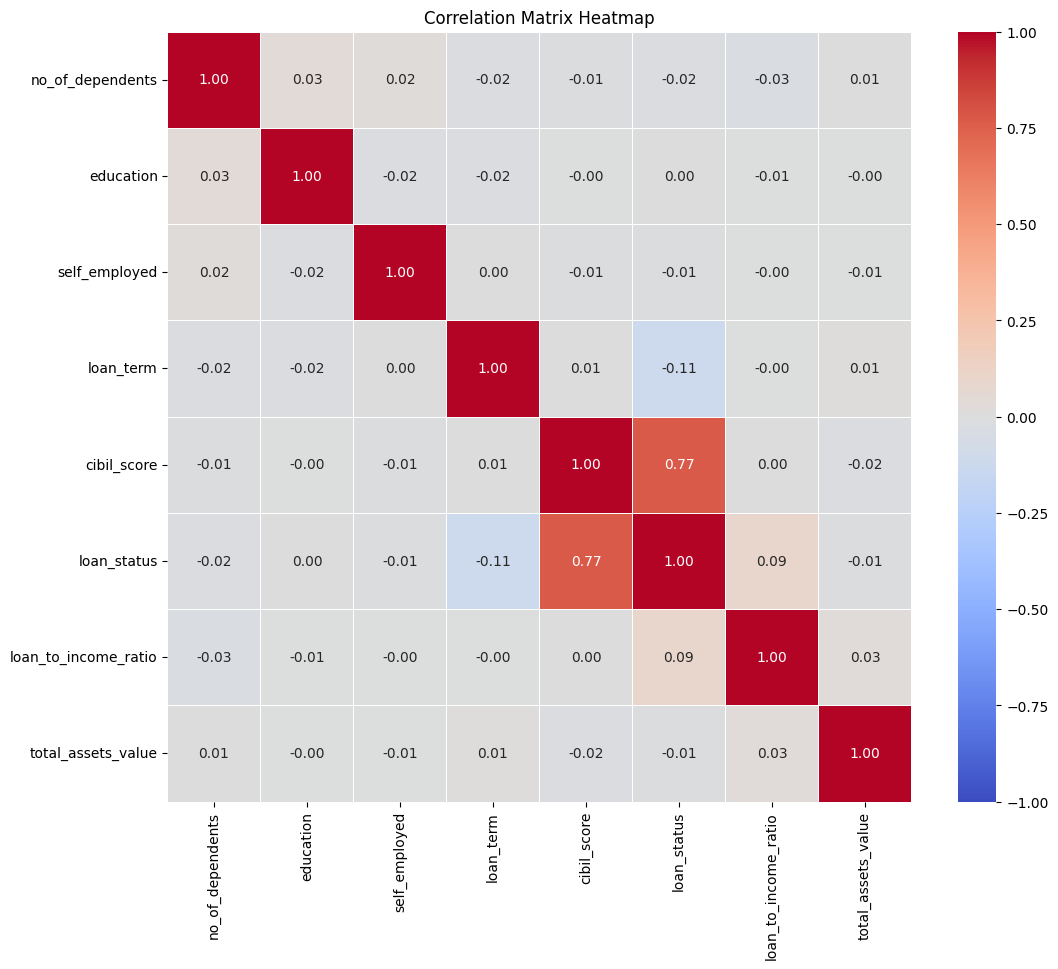

In [338]:
plt.figure(figsize=(12, 10))  
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, vmin=-1, vmax=1)


plt.title('Correlation Matrix Heatmap')
plt.show()

In [339]:
data.drop(columns=['education'],inplace=True) #co-relation of loan_status with education is 0.00

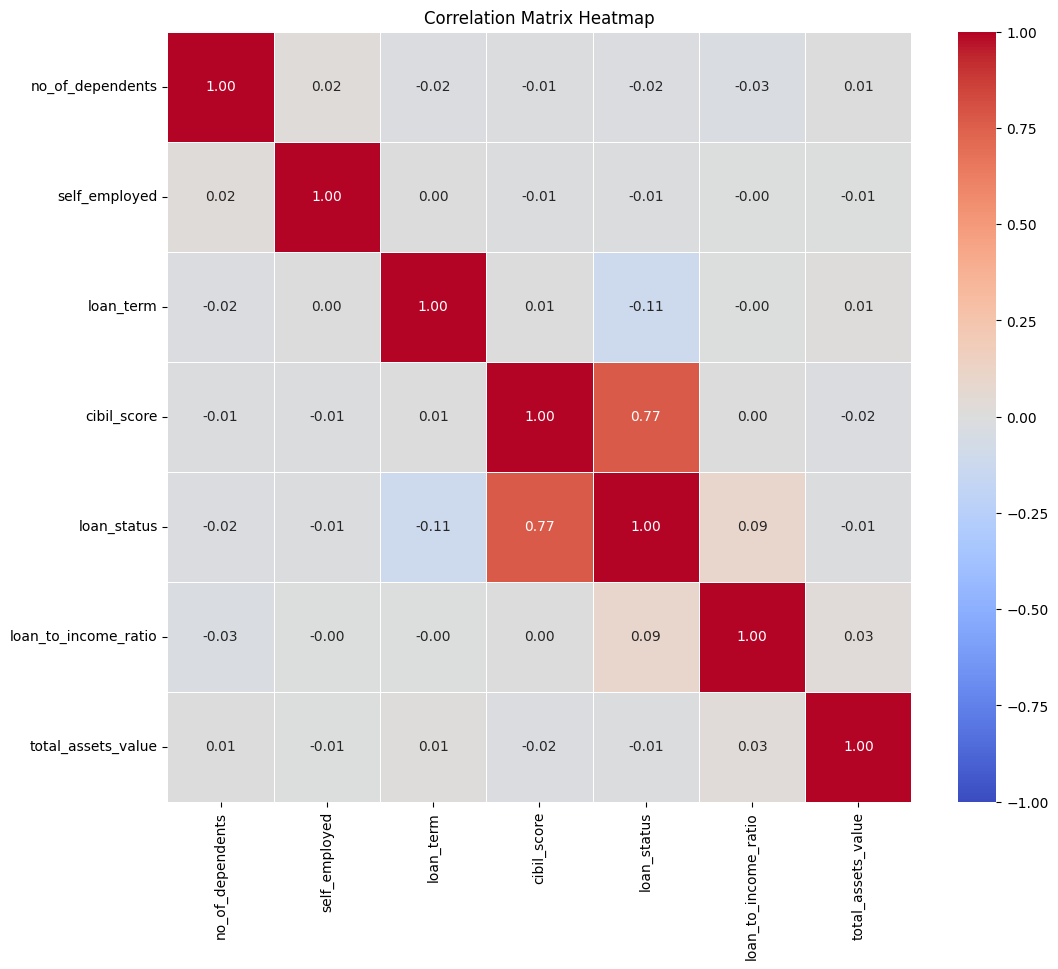

In [340]:
plt.figure(figsize=(12, 10))  
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, vmin=-1, vmax=1)


plt.title('Correlation Matrix Heatmap')
plt.show()

<Axes: xlabel='loan_status'>

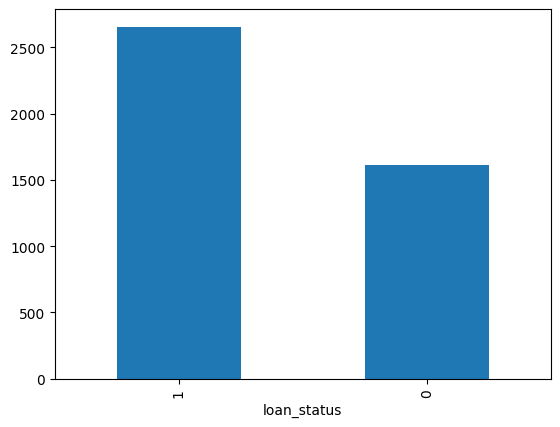

In [341]:
data['loan_status'].value_counts().plot(kind='bar')

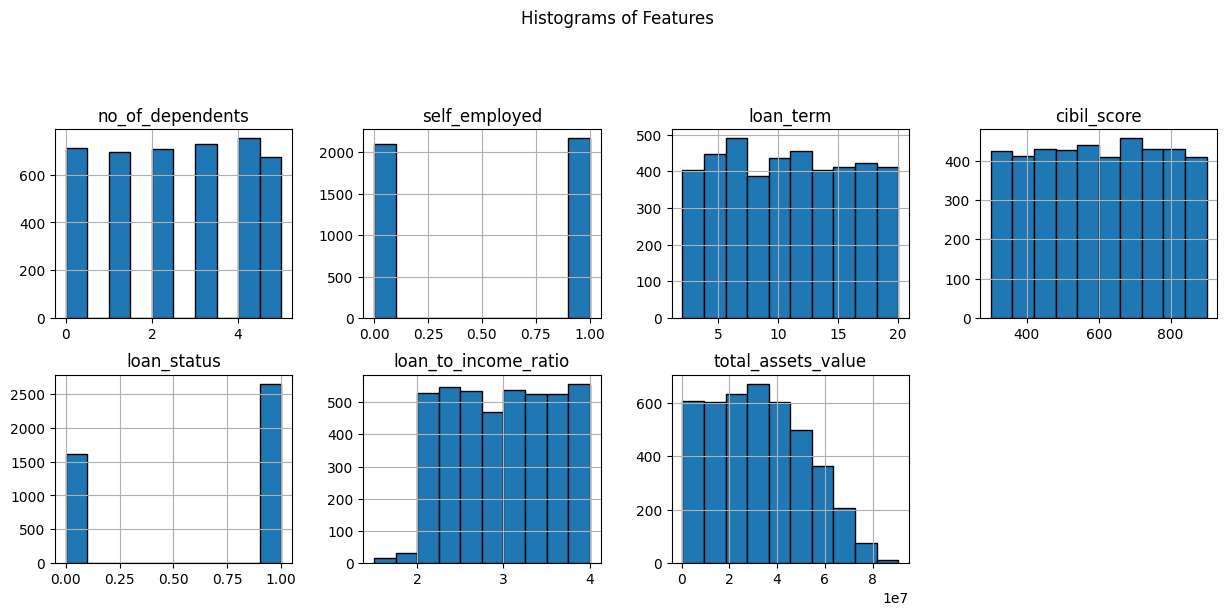

In [342]:
data.hist(bins=10, figsize=(15, 12), layout=(4, 4), edgecolor='black')
plt.suptitle('Histograms of Features')
plt.show()

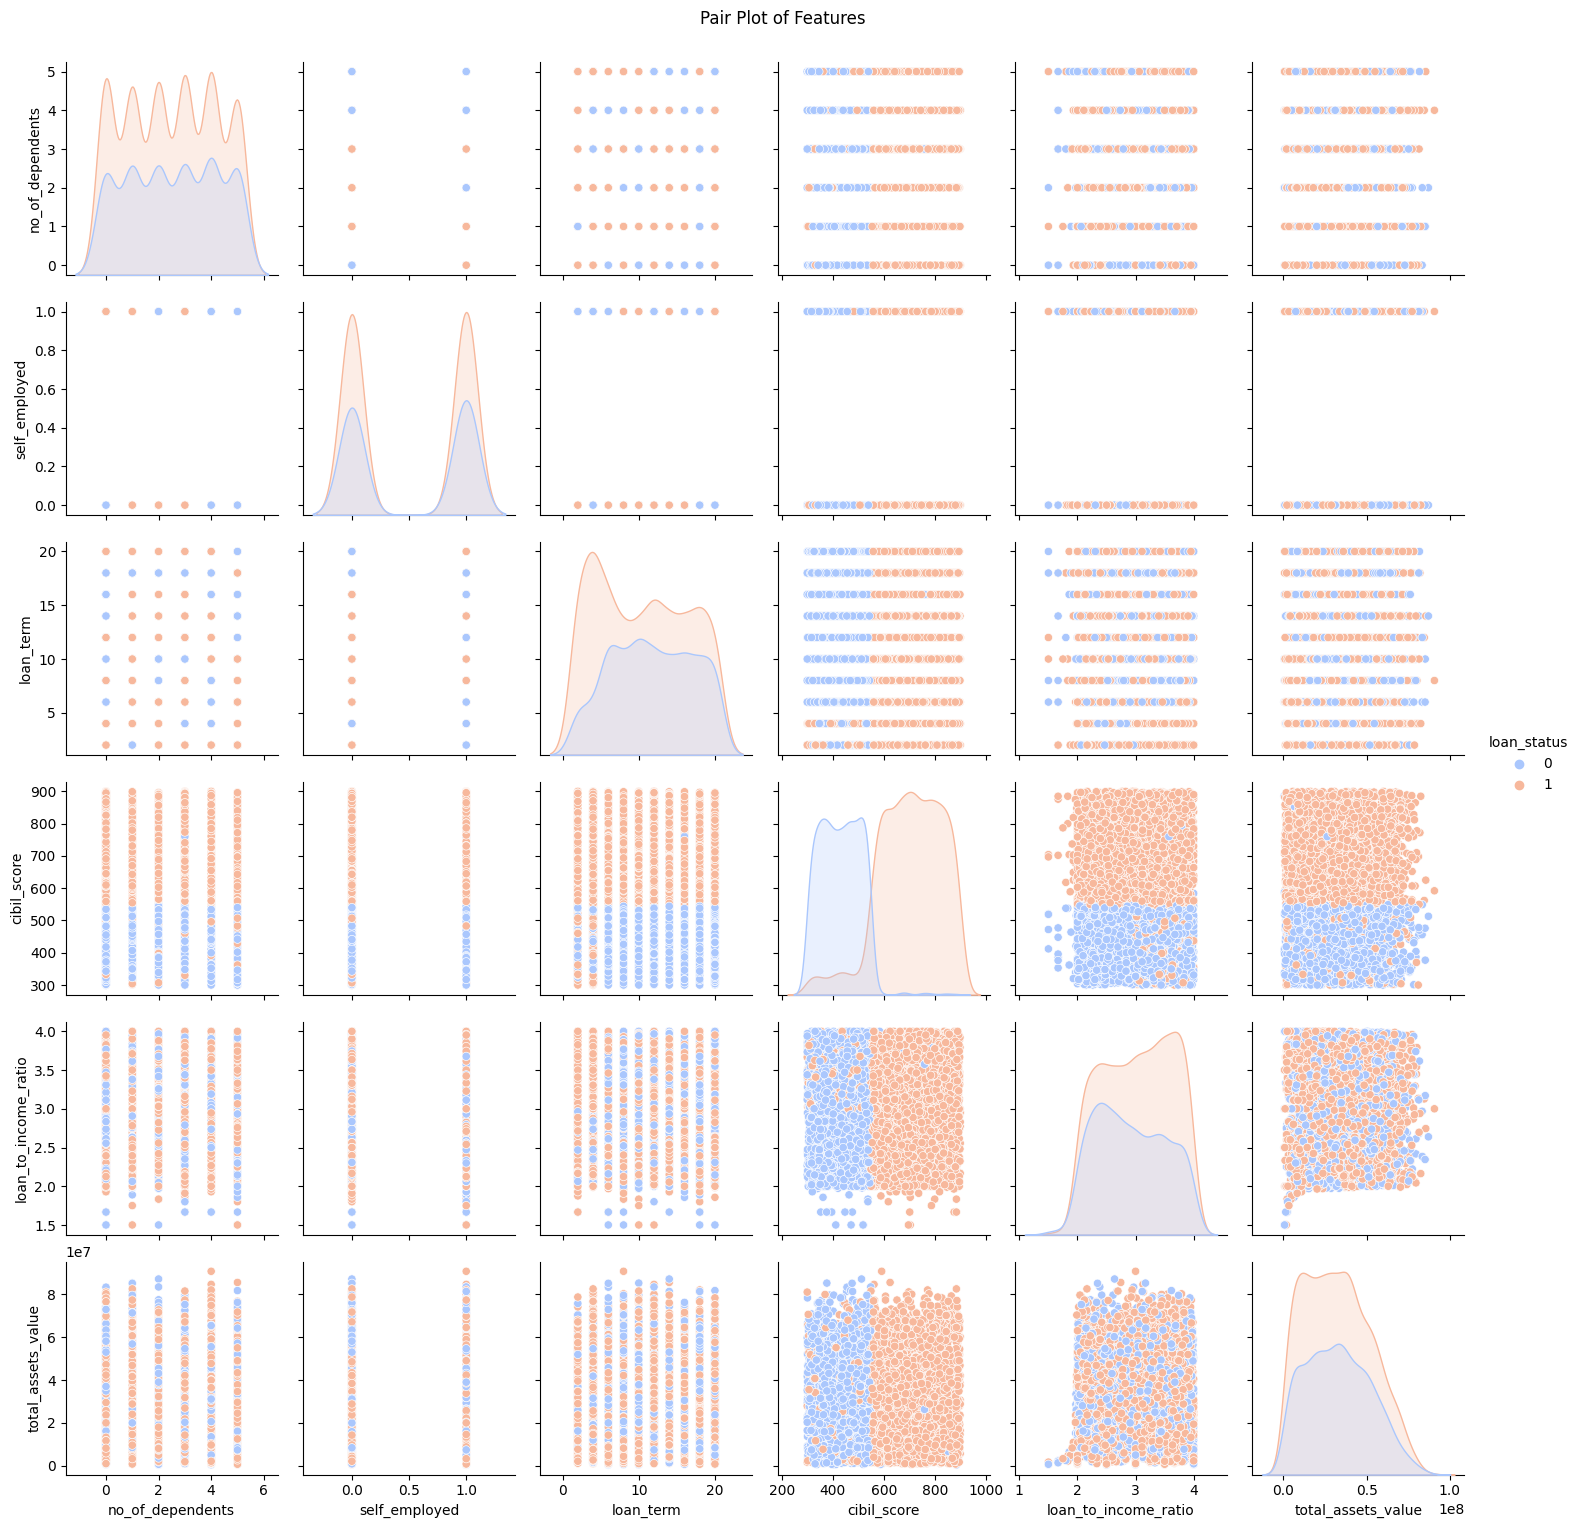

In [343]:
sns.pairplot(data, diag_kind='kde', hue='loan_status', palette='coolwarm')
plt.suptitle('Pair Plot of Features', y=1.02)
plt.show()

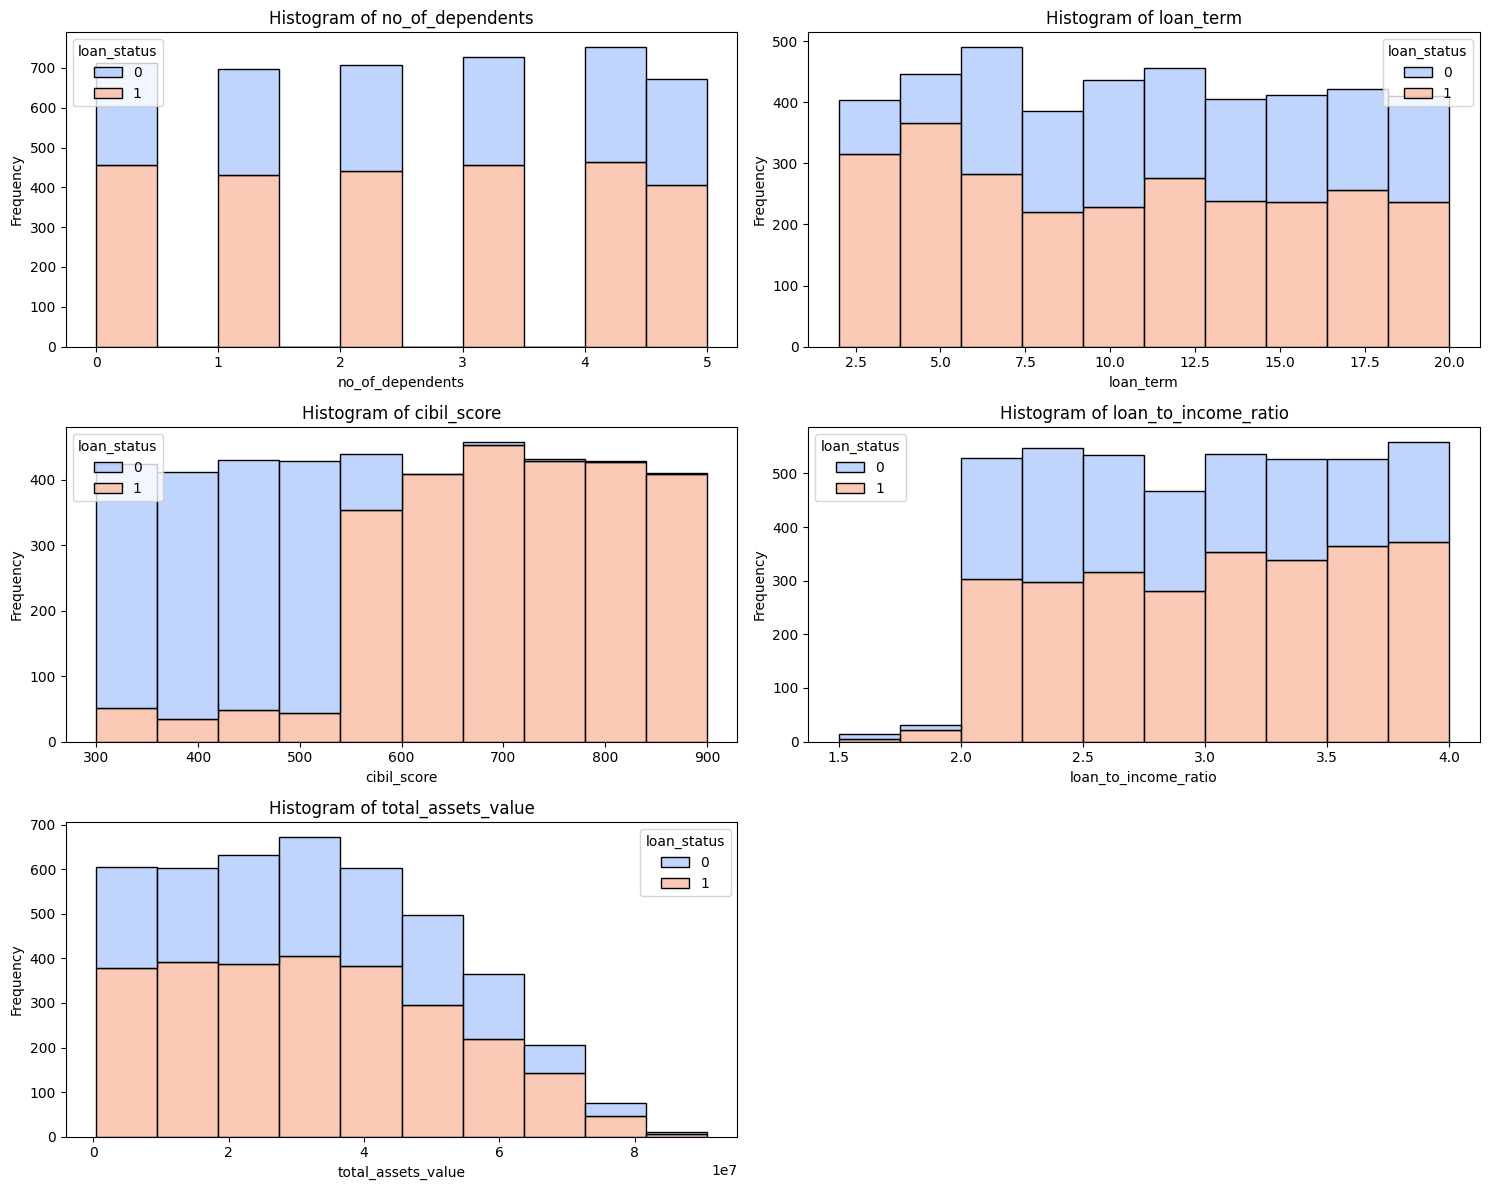

In [344]:
# Plot histograms for each feature, separated by loan_status
features = ['no_of_dependents' , 'loan_term', 'cibil_score', 
            'loan_to_income_ratio', 'total_assets_value']

plt.figure(figsize=(15, 12))
for i, feature in enumerate(features, 1):
    plt.subplot(3, 2, i)  
    sns.histplot(data=data, x=feature, hue='loan_status', multiple='stack', palette='coolwarm', bins=10)
    plt.title(f'Histogram of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


In [345]:
X=data.drop(columns='loan_status')
y=data['loan_status']

In [346]:
X.head()

,no_of_dependents,self_employed,loan_term,cibil_score,loan_to_income_ratio,total_assets_value
0,2,0,12,778,3.114583,50700000
1,0,0,8,417,2.975610,17000000
2,3,0,20,506,3.263736,57700000
3,3,0,8,467,3.743902,52700000
4,5,0,20,382,2.469388,55000000


In [347]:
y.head()

0    1
1    0
2    0
3    0
4    0
Name: loan_status, dtype: int64

In [400]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [401]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train_scaled, y_train)


In [402]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(penalty='l2', random_state=42)


scores = cross_val_score(model, X_train_res, y_train_res, cv=5)
print("Cross-validation scores:", scores)
print("Mean cross-validation score:", scores.mean())
print("Standard deviation of cross-validation score:", scores.std())

Cross-validation scores: [0.92828146 0.9188092  0.93224932 0.94850949 0.93902439]
Mean cross-validation score: 0.933374772178033
Standard deviation of cross-validation score: 0.010003419577915442


In [403]:
model.fit( X_train_res, y_train_res)

LogisticRegression(random_state=42)

In [404]:
y_pred = model.predict(X_test_scaled)

0.9102263856362217
              precision    recall  f1-score   support

           0       0.85      0.92      0.88       471
           1       0.95      0.90      0.93       810

    accuracy                           0.91      1281
   macro avg       0.90      0.91      0.91      1281
weighted avg       0.91      0.91      0.91      1281



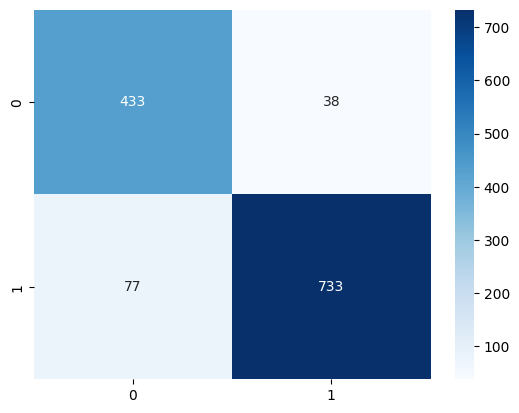

In [405]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# Evaluation
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.show()

Best parameters found: {'C': 0.01, 'solver': 'lbfgs'}
Best cross-validation score: 0.9401450726279927
Accuracy: 0.9063231850117096
              precision    recall  f1-score   support

           0       0.82      0.95      0.88       471
           1       0.97      0.88      0.92       810

    accuracy                           0.91      1281
   macro avg       0.90      0.92      0.90      1281
weighted avg       0.91      0.91      0.91      1281



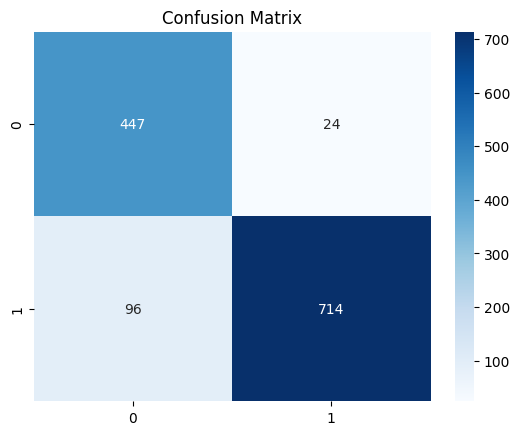

In [406]:
#hyperparameter tuning
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  
    'solver': ['liblinear', 'lbfgs'] 
}


model = LogisticRegression(penalty='l2', random_state=42)


grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy')


grid_search.fit(X_train_res, y_train_res)


print("Best parameters found:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)


best_model = grid_search.best_estimator_
best_model.fit(X_train_res, y_train_res)


y_pred = best_model.predict(X_test_scaled)


from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print('Accuracy:', accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


import seaborn as sns
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

In [407]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_res, y_train_res)

RandomForestClassifier(random_state=42)

In [408]:
y_pred = rf.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9976580796252927


              precision    recall  f1-score   support

           0       1.00      0.99      1.00       471
           1       1.00      1.00      1.00       810

    accuracy                           1.00      1281
   macro avg       1.00      1.00      1.00      1281
weighted avg       1.00      1.00      1.00      1281



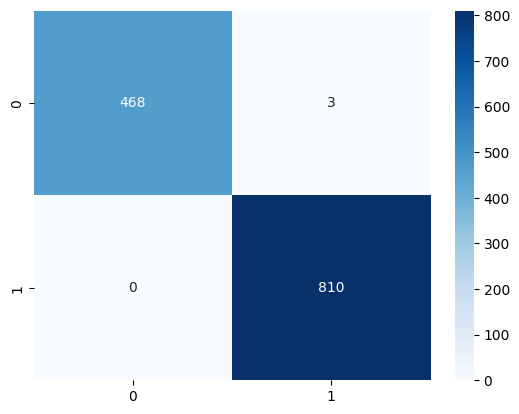

In [409]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


print(classification_report(y_test, y_pred))


conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.show()